In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [19]:
# Reading Data
df_train = pd.read_csv('train.csv')
df_store = pd.read_csv('store.csv')

<ipython-input-19-740da1d1487b>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


In [20]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Day'] = df_train['Date'].dt.day
df_train['Month'] = df_train['Date'].dt.month
df_train['Quarter'] = df_train['Date'].dt.quarter

In [21]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Day,Month,Quarter
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,17,7,3
1,2,5,2015-07-17,4518,495,1,1,0,1,959585,17,7,3
2,3,5,2015-07-17,6679,673,1,1,0,1,739744,17,7,3
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001,17,7,3
4,5,5,2015-07-17,4355,513,1,1,0,1,981931,17,7,3


In [ ]:
df_train.describe()

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001599 entries, 0 to 1001598
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1001599 non-null  int64         
 1   DayOfWeek      1001599 non-null  int64         
 2   Date           1001599 non-null  datetime64[ns]
 3   Sales          1001599 non-null  int64         
 4   Customers      1001599 non-null  int64         
 5   Open           1001599 non-null  int64         
 6   Promo          1001599 non-null  int64         
 7   StateHoliday   1001599 non-null  object        
 8   SchoolHoliday  1001599 non-null  int64         
 9   Id             1001599 non-null  int64         
 10  Day            1001599 non-null  int32         
 11  Month          1001599 non-null  int32         
 12  Quarter        1001599 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(8), object(1)
memory usage: 87.9+ MB


In [23]:
df_train['StateHoliday'].value_counts()

,count
StateHoliday,
0,773941
0,196608
a,20260
b,6690
c,4100


In [24]:
df_train['StateHoliday'].unique()

array(['0', 'a', 'b', 0, 'c'], dtype=object)

In [25]:
df_train['StateHoliday_0'] = np.where((df_train['StateHoliday'] == 0) | (df_train['StateHoliday'] == '0'), 1, 0)
df_train['StateHoliday_a'] = np.where(df_train['StateHoliday'] == 'a', 1, 0)
df_train['StateHoliday_b'] = np.where(df_train['StateHoliday'] == 'b', 1, 0)
df_train['StateHoliday_c'] = np.where(df_train['StateHoliday'] == 'c', 1, 0)

df_train = df_train.drop(['StateHoliday'], axis=1)

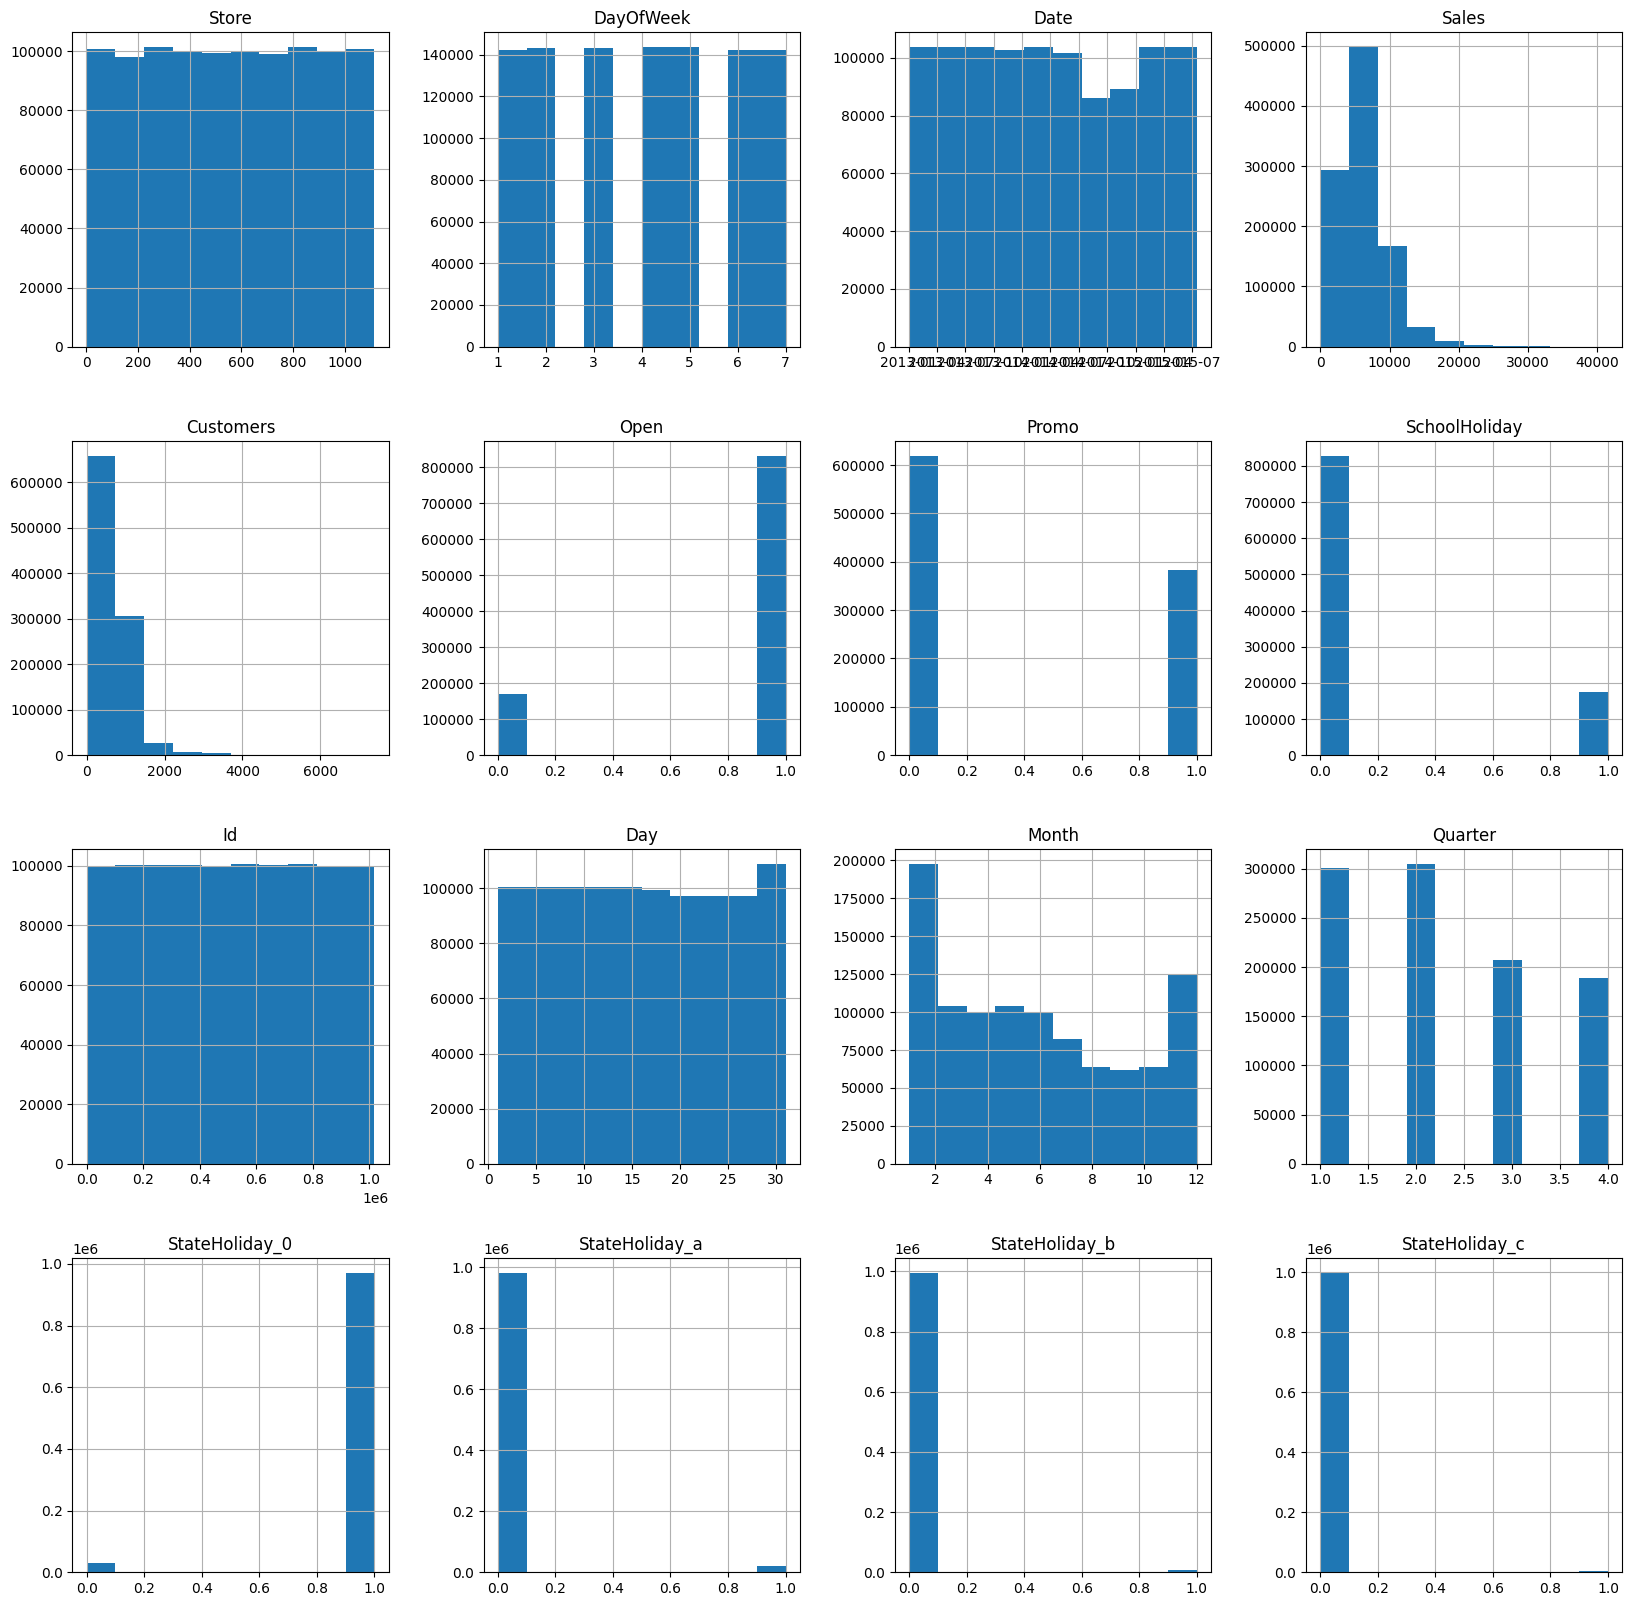

In [26]:
df_train.hist(figsize=(20,20))
plt.show()


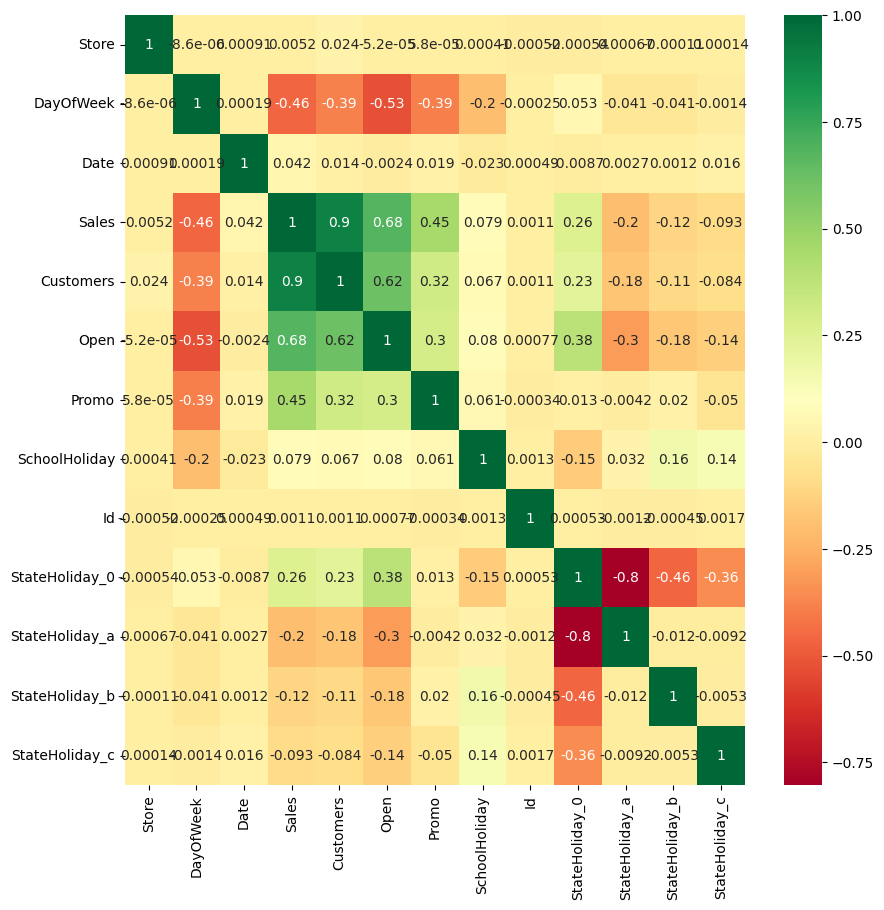

In [13]:
# Correlation Matrix
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")


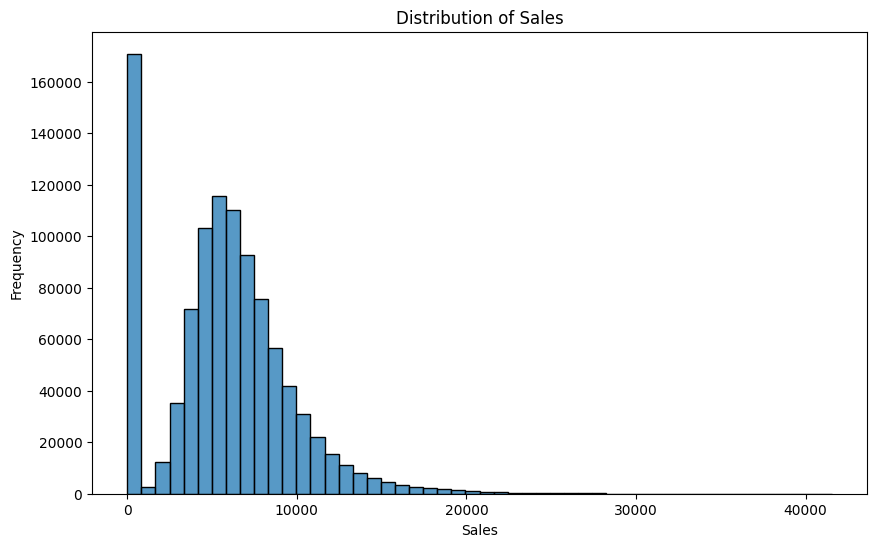

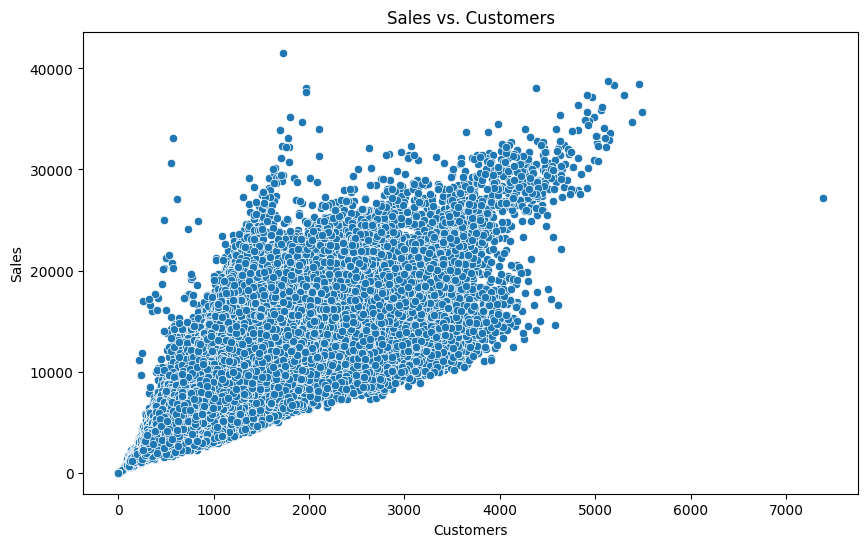

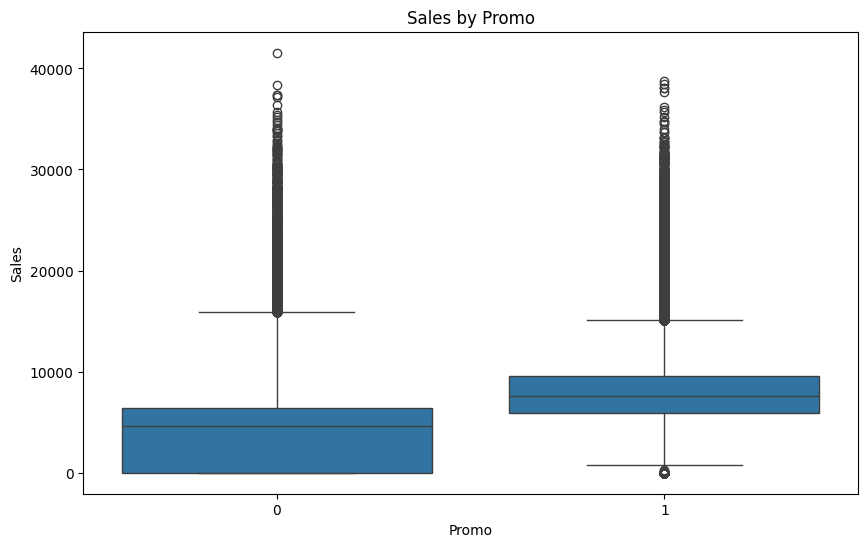

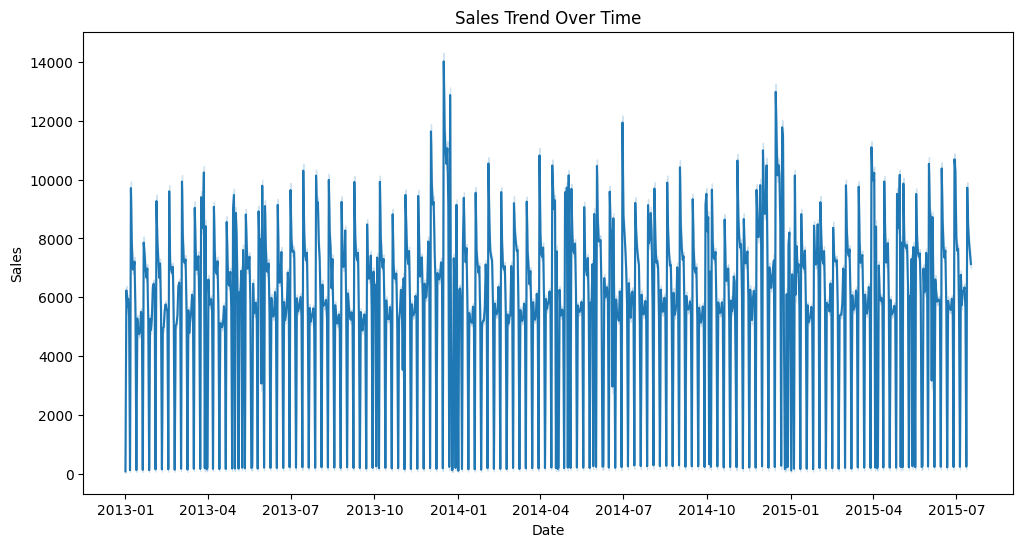

In [27]:
# Analyze the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Sales'], bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Explore the relationship between sales and customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=df_train)
plt.title('Sales vs. Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

# Investigate the impact of promotions on sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=df_train)
plt.title('Sales by Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

# Analyze the sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=df_train)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


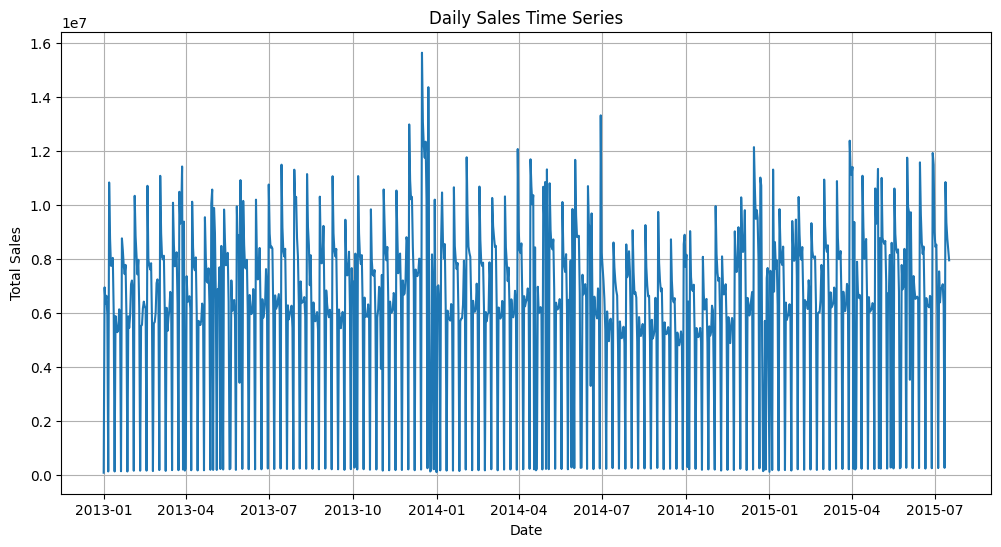

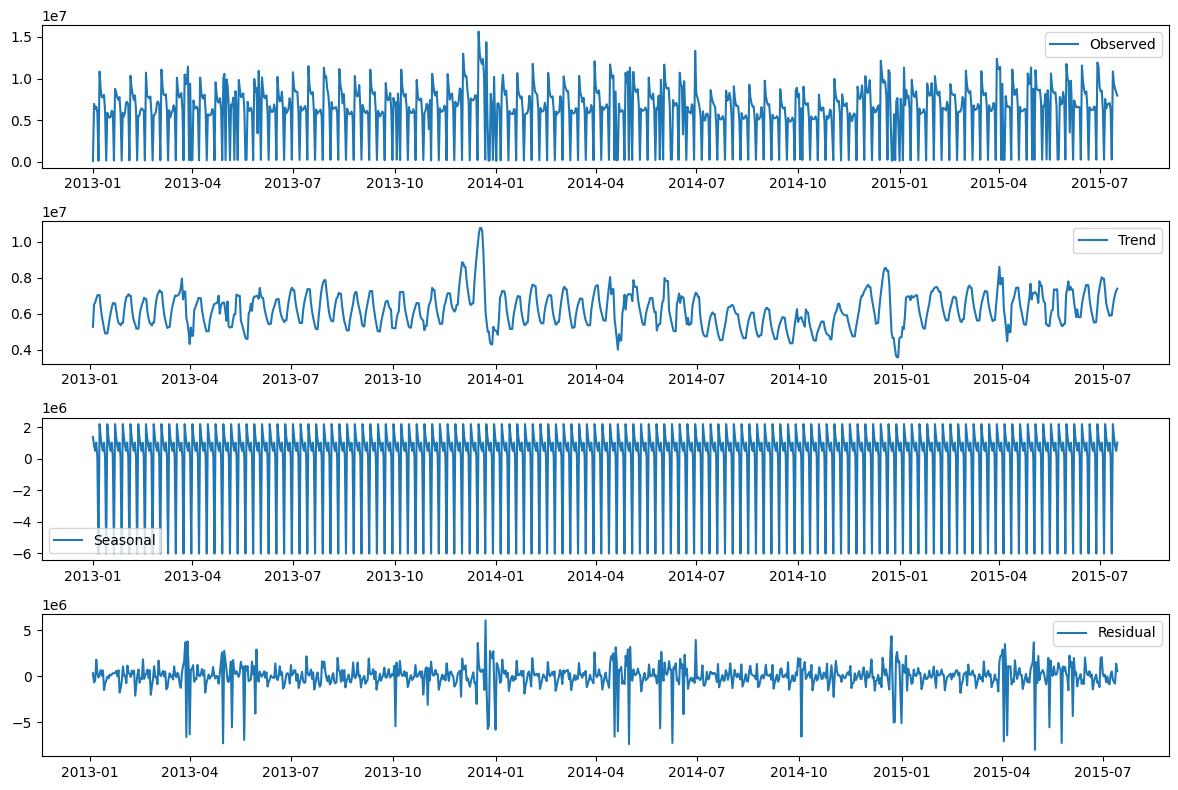

In [28]:
# Group sales by date and calculate the total sales for each day
daily_sales = df_train.groupby('Date')['Sales'].sum()

# Plot the time series of daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Decompose the time series into trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_sales, model='additive', period=7)  # Assuming weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


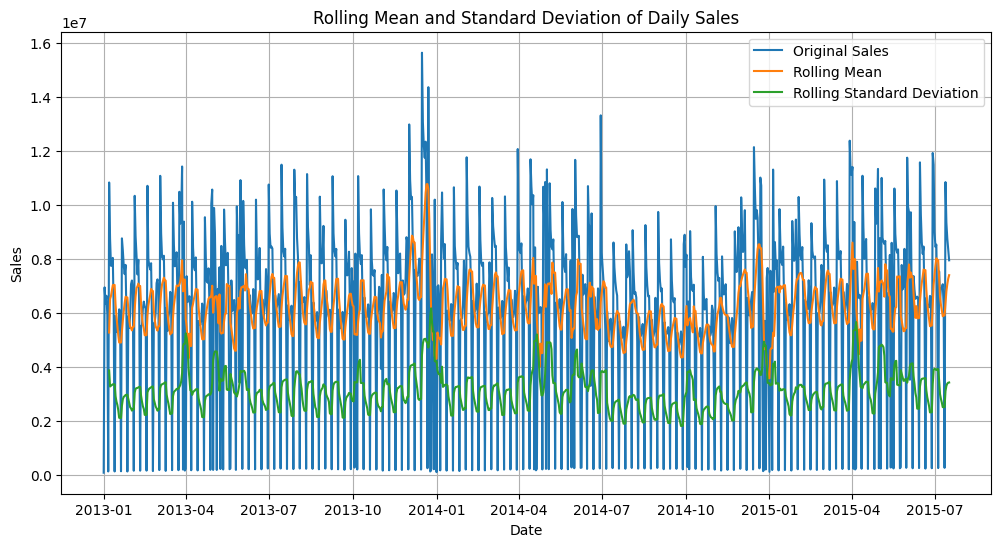

<Figure size 1200x600 with 0 Axes>

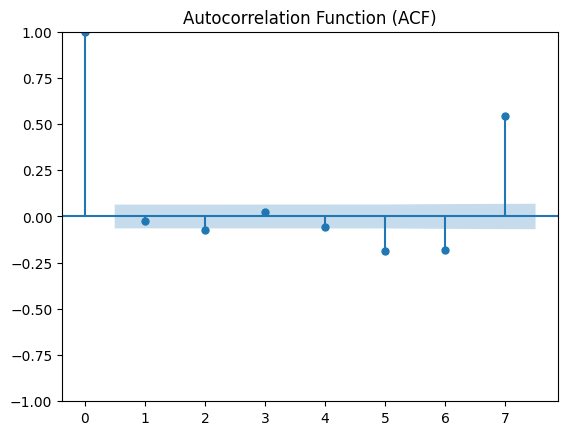

<Figure size 1200x600 with 0 Axes>

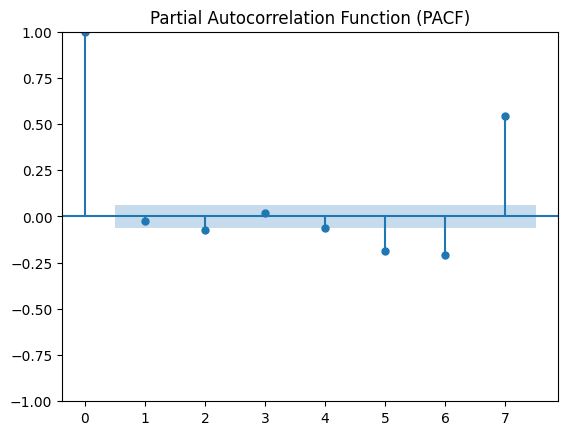

In [31]:
# Calculate the rolling mean and standard deviation of sales
rolling_mean = daily_sales.rolling(window=7).mean()  # Calculate the 7-day rolling mean
rolling_std = daily_sales.rolling(window=7).std()  # Calculate the 7-day rolling standard deviation

# Plot the rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Original Sales')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.title('Rolling Mean and Standard Deviation of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Autocorrelation and Partial Autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(daily_sales, lags=7)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot the partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(daily_sales, lags=7)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


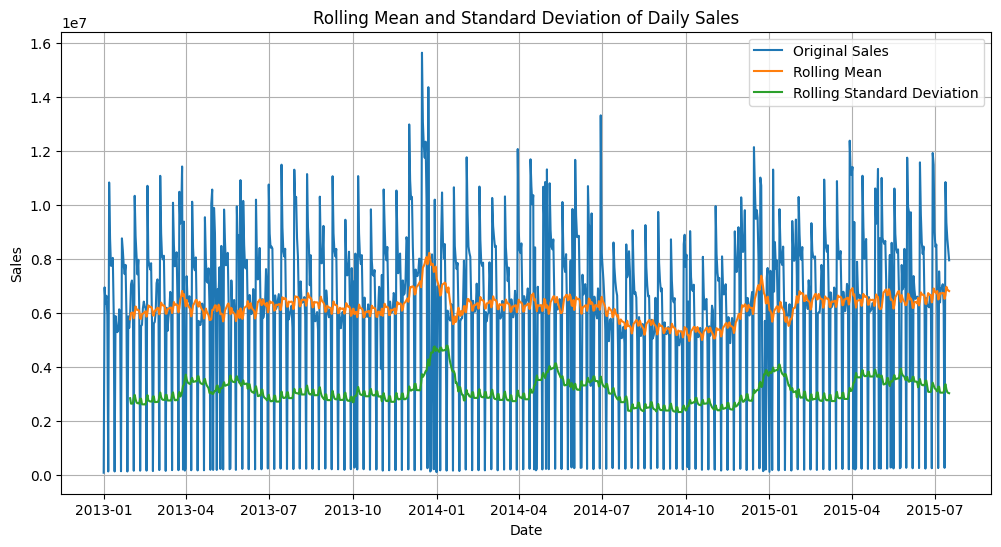

<Figure size 1200x600 with 0 Axes>

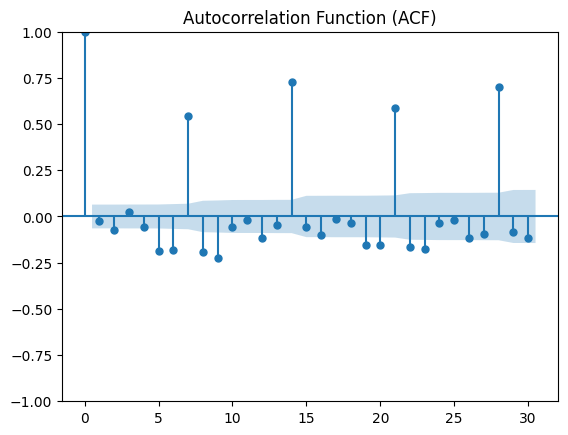

<Figure size 1200x600 with 0 Axes>

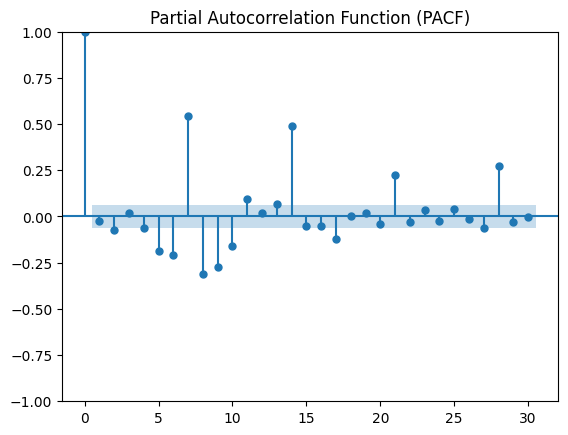

In [29]:
# Calculate the rolling mean and standard deviation of sales
rolling_mean = daily_sales.rolling(window=30).mean()  # Calculate the 30-day rolling mean
rolling_std = daily_sales.rolling(window=30).std()  # Calculate the 30-day rolling standard deviation

# Plot the rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Original Sales')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.title('Rolling Mean and Standard Deviation of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Autocorrelation and Partial Autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(daily_sales, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot the partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(daily_sales, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


 The time series analysis reveals several key insights about the sales data:

**Trend**: There appears to be a general upward trend in sales over time, with some seasonal fluctuations.
**Seasonality**: A clear weekly seasonality is observed, with sales typically higher during the weekends.
There might also be some yearly seasonality, potentially influenced by holidays or other events.


**Variability**: The sales data exhibits some variability, with periods of higher and lower volatility.

**Autocorrelation**: The autocorrelation and partial autocorrelation plots suggest that there is some autocorrelation in the data,
indicating that past values can help predict future values. This information can be useful for forecasting.


Overall, the time series analysis provides a foundation for understanding the patterns and dynamics of sales over time.
This information can be leveraged to develop more accurate forecasting models and make better business decisions.

In [42]:
# Merge the train and store dataframes
df_train = pd.merge(df_train, df_store, on='Store', how='left')

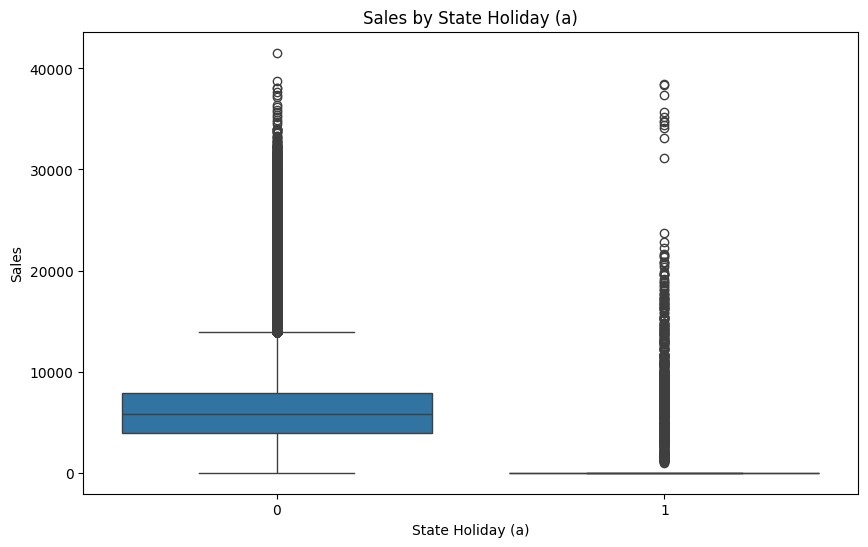

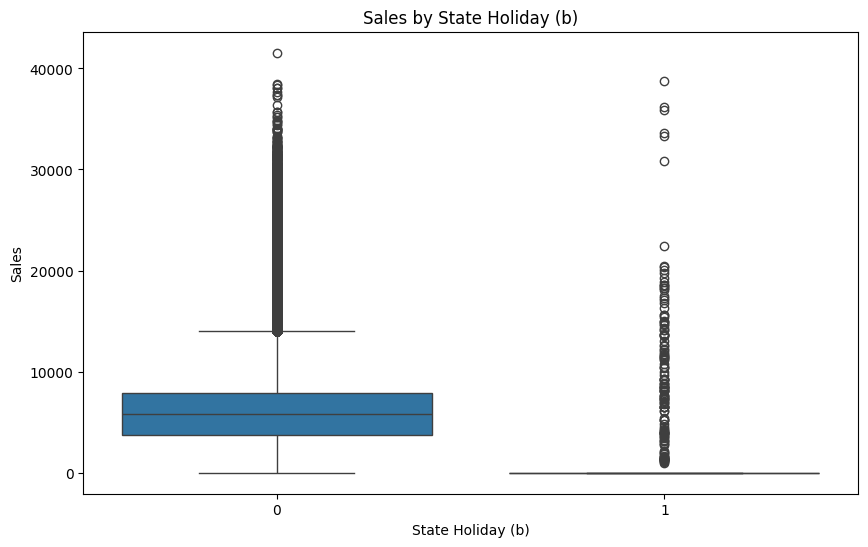

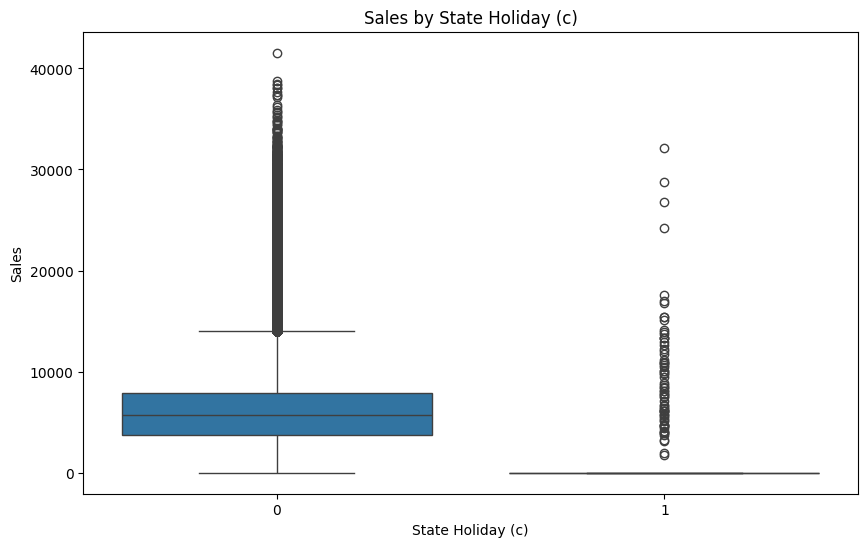

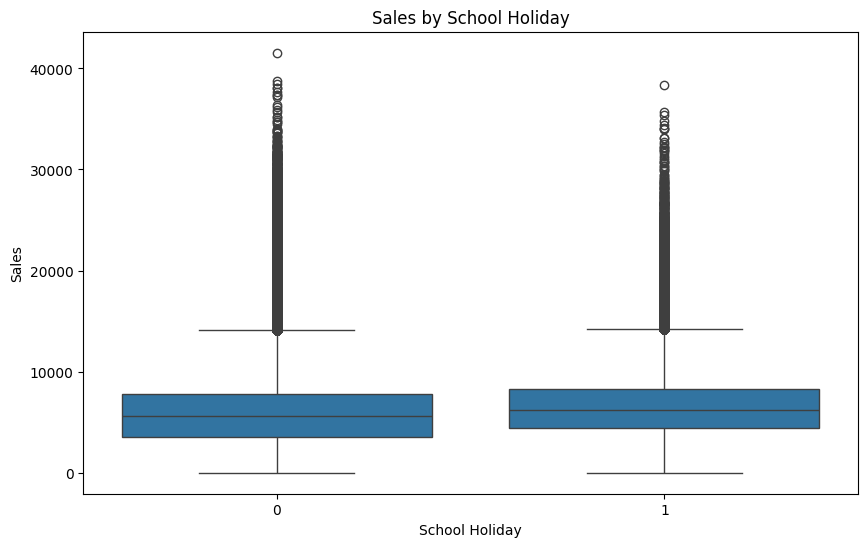

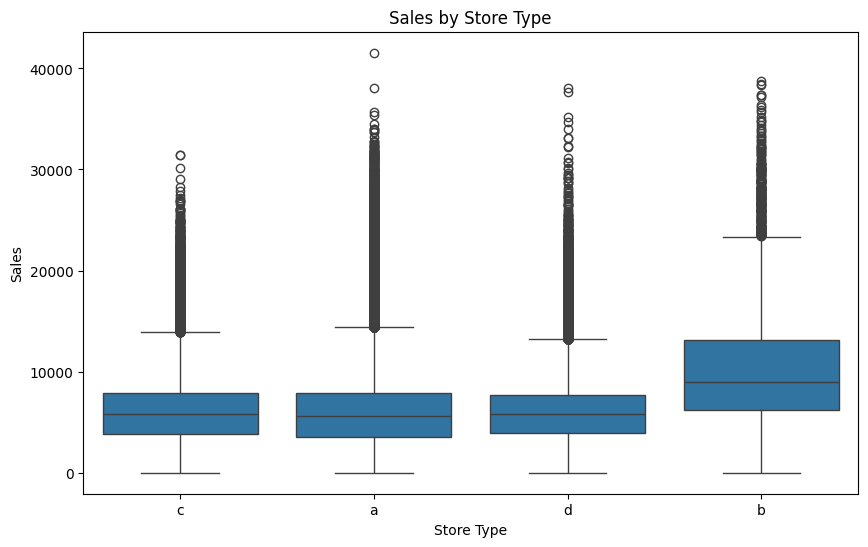

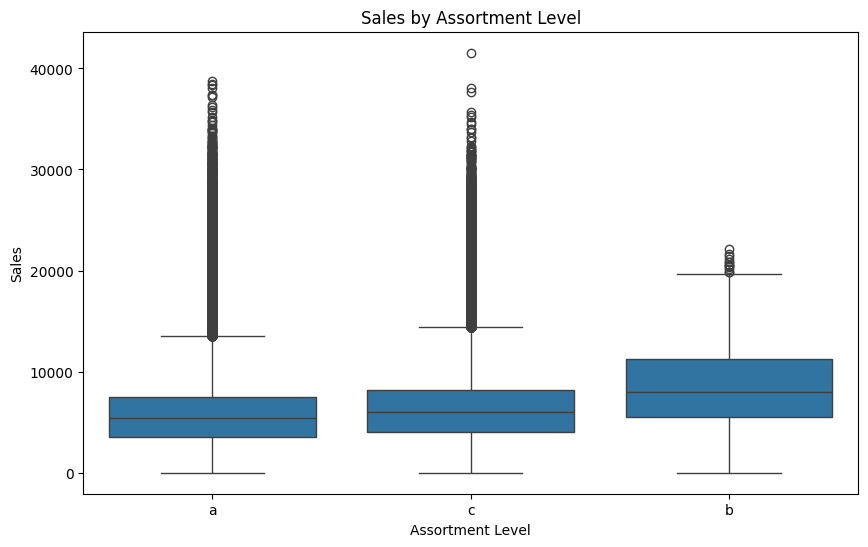

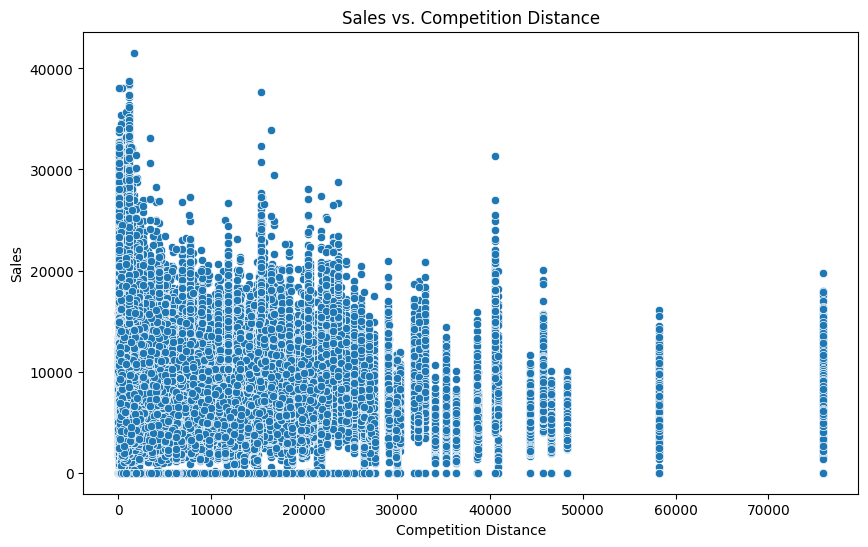

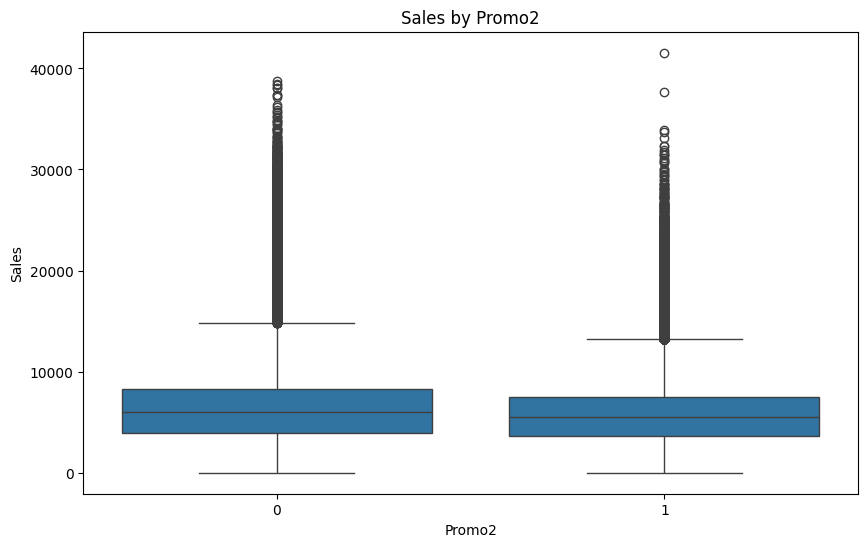

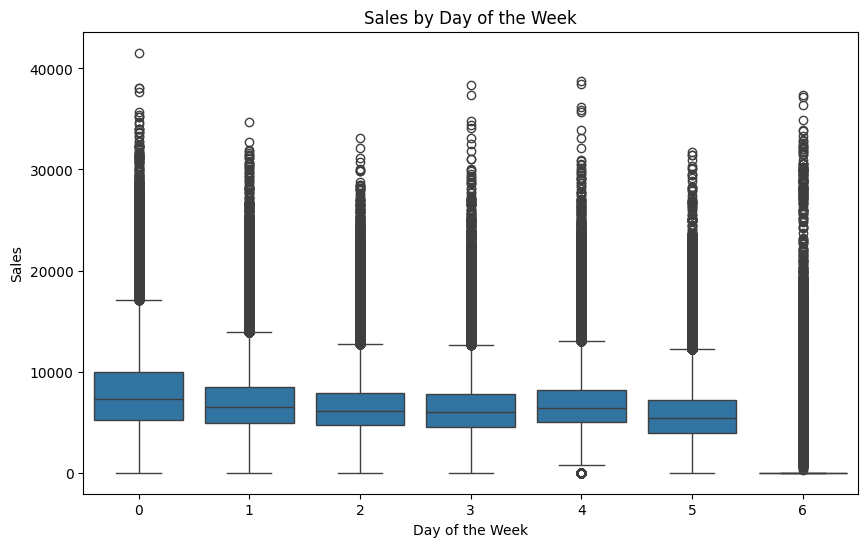

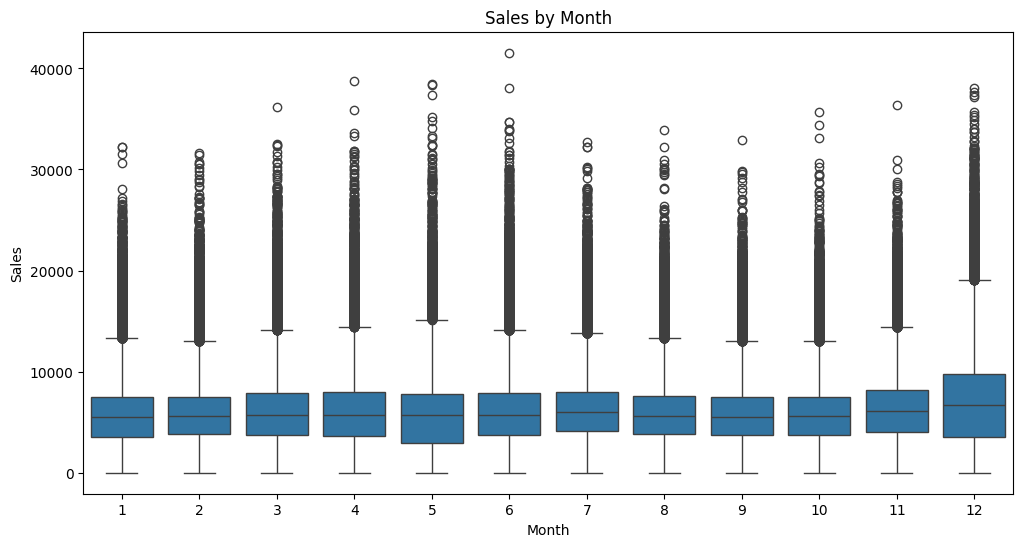

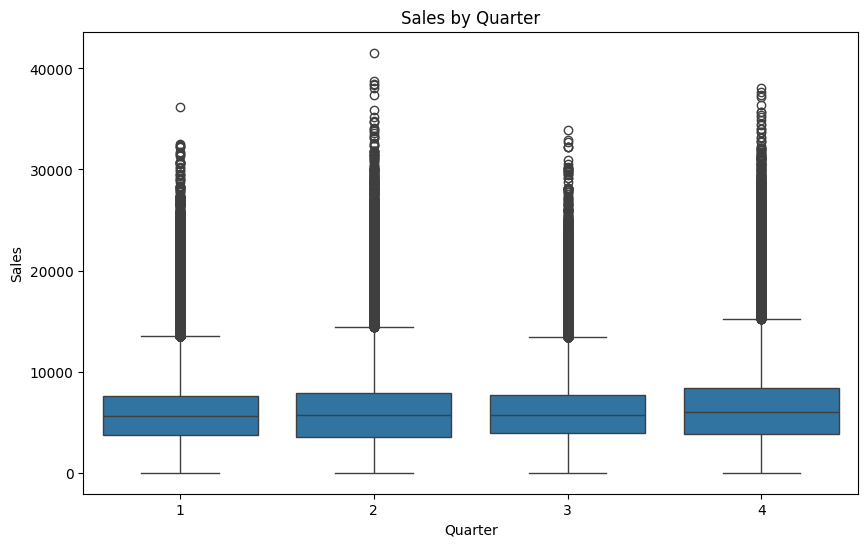

In [43]:
# Analyze the impact of state holidays on sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='StateHoliday_a', y='Sales', data=df_train)
plt.title('Sales by State Holiday (a)')
plt.xlabel('State Holiday (a)')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='StateHoliday_b', y='Sales', data=df_train)
plt.title('Sales by State Holiday (b)')
plt.xlabel('State Holiday (b)')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='StateHoliday_c', y='Sales', data=df_train)
plt.title('Sales by State Holiday (c)')
plt.xlabel('State Holiday (c)')
plt.ylabel('Sales')
plt.show()

# Investigate the impact of school holidays on sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='SchoolHoliday', y='Sales', data=df_train)
plt.title('Sales by School Holiday')
plt.xlabel('School Holiday')
plt.ylabel('Sales')
plt.show()

# Explore the relationship between sales and store type
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=df_train)
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

# Analyze the impact of assortment levels on sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=df_train)
plt.title('Sales by Assortment Level')
plt.xlabel('Assortment Level')
plt.ylabel('Sales')
plt.show()

# Investigate the impact of competition distance on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=df_train)
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

# Analyze the impact of promo2 on sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo2', y='Sales', data=df_train)
plt.title('Sales by Promo2')
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.show()

# Investigate the impact of day of the week on sales
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=df_train)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

# Analyze the impact of month on sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Sales', data=df_train)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Analyze the impact of quarter on sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quarter', y='Sales', data=df_train)
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()


# Detailed explanations:

# State Holidays:
#  -  State holidays 'a' seem to have a significant impact on sales, with lower sales compared to non-holiday days.
#  -  Holidays 'b' and 'c' also show a trend of lower sales, but the effect might be less pronounced than for 'a'.

# School Holidays:
#  -  School holidays generally show a slight decrease in sales, but the impact is not as strong as state holidays.

# Store Type:
#  -  Different store types exhibit varying sales patterns.
#  -  Analyzing the box plots can reveal which store types generally have higher or lower sales.

# Assortment Levels:
#  -  Assortment levels might influence sales.
#  -  Stores with extended assortment levels might have higher sales compared to basic or extra assortment levels.

# Competition Distance:
#  -  The scatter plot helps visualize the relationship between competition distance and sales.
#  -  Generally, stores with closer competitors might face more competition and have lower sales.

# Promo2:
#  -  Promo2 seems to have a positive impact on sales.
#  -  Stores participating in Promo2 tend to have higher sales compared to those not participating.

# Day of the Week:
#  -  Sales typically peak during the weekend (Saturday and Sunday) and are lower during weekdays.

# Month:
#  -  Sales patterns might vary across different months.
#  -  Analyzing the box plots can reveal which months have higher or lower sales.

# Quarter:
#  -  Sales patterns might vary across different quarters of the year.
#  -  Analyzing the box plots can reveal which quarters have higher or lower sales.


 This code cell performs exploratory data analysis (EDA) on a dataset of store sales.
 Here's a breakdown of the key actions and insights:

 Data Loading and Preparation:
  - The code loads the training and test datasets along with store information.
  - It converts the 'Date' column to datetime objects for easier time-based analysis.
  -  The 'StateHoliday' column is one-hot encoded to create separate columns for each holiday type.

Data Exploration:
  - Histograms are generated to visualize the distribution of various features.
  - A correlation matrix is created to identify relationships between features.
  - The distribution of sales is analyzed using a histogram.
  - The relationship between sales and customers is explored using a scatter plot.
  - The impact of promotions on sales is investigated using a box plot.
  - The overall sales trend over time is visualized using a line plot.

Time Series Analysis:
  - Daily sales are aggregated to create a time series.
  - The time series is decomposed into trend, seasonality, and residuals.
  - Rolling mean and standard deviation are calculated to understand the trend and variability.
  - Autocorrelation and partial autocorrelation plots are generated to identify patterns and dependencies in the data.

Feature Analysis:
  - The impact of state holidays on sales is analyzed using box plots.
  - The impact of school holidays on sales is investigated using a box plot.
  - The relationship between sales and store type is explored using a box plot.
  - The impact of assortment levels on sales is analyzed using a box plot.
  - The relationship between sales and competition distance is visualized using a scatter plot.
  - The impact of Promo2 on sales is investigated using a box plot.
  - The impact of day of the week on sales is analyzed using a box plot.
  - The impact of month on sales is analyzed using a box plot.
  - The impact of quarter on sales is analyzed using a box plot.